## Import dependencies

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.8.0


## Load Data set

In [29]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## make model

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [31]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.42817426, -0.6903485 , -0.2440113 , -0.5194378 ,  0.791416  ,
        -0.43275878, -0.07746899, -0.28322506,  0.47636312,  0.13555974]],
      dtype=float32)

In [32]:
tf.nn.softmax(predictions).numpy()

array([[0.06635854, 0.05105472, 0.07977701, 0.06057056, 0.22467674,
        0.06605501, 0.09423368, 0.0767092 , 0.16395791, 0.11660667]],
      dtype=float32)

In [33]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [34]:
loss_fn(y_train[:1], predictions).numpy()

2.7172675

In [35]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Teaching model

In [36]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2950 - accuracy: 0.9150
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1418 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1092 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0737 - accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0533 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0491 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.042

In [37]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0684 - accuracy: 0.9810 - 574ms/epoch - 2ms/step


[0.0684099942445755, 0.9810000061988831]

In [38]:
history = model.fit(x_train,
                    y_train,
                    batch_size=200,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
240/240 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 2/20
240/240 [==============================] - 1s 4ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0122 - val_accuracy: 0.9970
Epoch 3/20
240/240 [==============================] - 1s 5ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0122 - val_accuracy: 0.9970
Epoch 4/20
240/240 [==============================] - 1s 5ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 5/20
240/240 [==============================] - 1s 5ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0130 - val_accuracy: 0.9965
Epoch 6/20
240/240 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0140 - val_accuracy: 0.9960
Epoch 7/20
240/240 [==============================] - 2s 7ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0147 - val_accuracy: 0.9962
Epoch 

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [40]:
history.history['loss']

[0.029948895797133446,
 0.025660473853349686,
 0.023780256509780884,
 0.023720165714621544,
 0.02122323401272297,
 0.0211861040443182,
 0.01952793449163437,
 0.019732380285859108,
 0.019068768247961998,
 0.018946396186947823,
 0.018998432904481888,
 0.018003718927502632,
 0.01747720129787922,
 0.017236296087503433,
 0.01656070165336132,
 0.016360435634851456,
 0.0169631727039814,
 0.01631416194140911,
 0.015044886618852615,
 0.01644667237997055]

In [41]:
val_acc = history.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 1), "%", sep="")

Эпоха: 0 точность: 99.7%
Эпоха: 1 точность: 99.7%
Эпоха: 2 точность: 99.7%
Эпоха: 3 точность: 99.6%
Эпоха: 4 точность: 99.7%
Эпоха: 5 точность: 99.6%
Эпоха: 6 точность: 99.6%
Эпоха: 7 точность: 99.6%
Эпоха: 8 точность: 99.5%
Эпоха: 9 точность: 99.5%
Эпоха: 10 точность: 99.4%
Эпоха: 11 точность: 99.4%
Эпоха: 12 точность: 99.4%
Эпоха: 13 точность: 99.4%
Эпоха: 14 точность: 99.4%
Эпоха: 15 точность: 99.3%
Эпоха: 16 точность: 99.2%
Эпоха: 17 точность: 99.4%
Эпоха: 18 точность: 99.3%
Эпоха: 19 точность: 99.2%


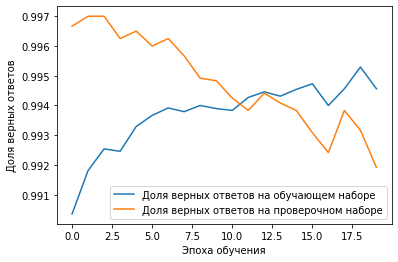

In [43]:
#Выводим график точности на обучающей выборке
#label - имя графика в легенде
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
#Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
#Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
#Выводим легенду
plt.legend()
plt.show()

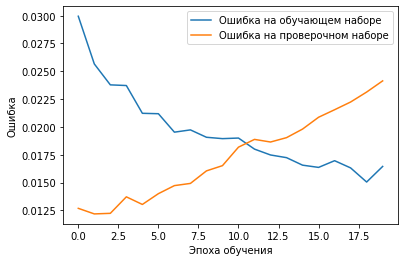

In [44]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()